In [5]:
import numpy as np
from scipy import stats

data=np.array([4,5,1,2,7,2,6,9,3])

a=np.mean(data) # 평균
print(a)

b=np.median(data) # 중앙값
print(b)

c=stats.mode(data)
print(c[0][0]) # 최빈값

4.333333333333333
4.0
2


In [8]:
from statistics import variance,stdev

points=np.array([20,80,90,95,87,89,95,99,97,100,60,70,77,88,89,89,90])

v=variance(points) # 분산
print(v)

s=stdev(points) # 표준편차
print(s)

d=np.max(points)-np.min(points) # 범위 = 최댓값 - 최솟값
print(d)

374
19.339079605813716
80


In [14]:
for val in [20,80,100]:
    d=np.percentile(points, val) # 백분위수
    print(str(val)+'%', d)

[ 20  60  70  77  80  87  88  89  89  89  90  90  95  95  97  99 100]
20% 77.6
80% 95.0
100% 100.0


In [13]:
a,b,c=np.percentile(points,[25,50,75])
print(a) # 1사분위수
print(b) # 2사분위수
print(c) # 3사분위수
print(c-a) # IQR(InterQuertile Range) - 상자수염그림의 박스 세로 길이

80.0
89.0
95.0
15.0


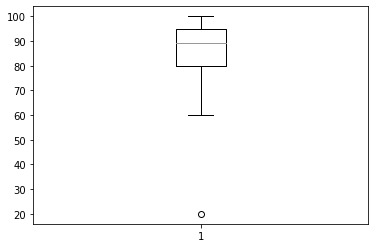

In [16]:
import matplotlib.pyplot as plt
plt.boxplot(points) # 상자수염그림
plt.show()

In [17]:
# 카이제곱 검정
import pandas as pd
from scipy import stats

data1=[4,6,17,16,8,9]
data2=[10,10,10,10,10,10]
chis=stats.chisquare(data1, data2)
chis

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [19]:
import pandas as pd
from scipy import stats

survey=pd.read_csv('d:/data/smoke/survey.csv')
data=pd.crosstab(survey.Smoke, survey.Exer)
print(data)
result=stats.chi2_contingency(observed=data) # 카이제곱 검정 수행
print('검정통계량 :',result[0])
print('p-value :',result[1])
# p-value가 0.48로 0.05보다 크므로 흡연습관과 운동횟수에는 상관관계가 없다.

Exer   Freq  None  Some
Smoke                  
Heavy     7     1     3
Never    87    18    84
Occas    12     3     4
Regul     9     1     7
검정통계량 : 5.488545890584232
p-value : 0.48284216946545633


In [20]:
# 단일표본 t검정
import pandas as pd
from scipy import stats
np.random.seed(1)
heights=[180+np.random.normal(0,5) for a in range(20)]
result=stats.ttest_1samp(heights, 175)
print('검정통계량 : %.3f, p-value : %.3f' % result)

검정통계량 : 3.435, p-value : 0.003


In [22]:
# 독립표본 t검정
import pandas as pd
from scipy import stats

group1=[170+np.random.normal(0,5) for a in range(20)]
group2=[175+np.random.normal(0,10) for a in range(20)]

print(group1)
print(group2)
print("group1의 평균 :",np.mean(group1))
print("group2의 평균 :",np.mean(group2))

result1=stats.ttest_ind(group1, group2)
print("검정통계량 : %.3f, p-value : %.3f" % result1)
result2=stats.ttest_ind(group1, group2, equal_var=False)
print("검정통계량 : %.3f, p-value : %.3f" % result2)

[166.22801029501673, 176.26434077616645, 172.56464910209004, 168.50953582448642, 172.44259073268748, 169.62214143489473, 175.65814693725713, 177.599084082111, 180.9278770326658, 163.0175183225593, 162.77943097285205, 167.47767068526775, 170.80018534723916, 174.38084460558113, 171.578174736208, 159.88899392087998, 168.46897993685815, 174.13987321303622, 171.15047367682192, 173.81005590156013]
[172.7767185738964, 172.99241931070003, 176.86561390988285, 179.10051647208257, 176.9829972012677, 176.19008645807457, 168.2933771371097, 178.7756378632092, 176.21821270991438, 186.29483907911919, 186.98917879901506, 176.85156417483944, 171.24715049909886, 168.61269592545779, 179.23494354064113, 175.7734006834856, 171.56146324428926, 175.43596856834247, 168.79999156051872, 181.9803203407222]
group1의 평균 : 170.86542887681196
group2의 평균 : 176.04885480258335
검정통계량 : -3.118, p-value : 0.003
검정통계량 : -3.118, p-value : 0.003


In [23]:
# 대응표본 t검정
import pandas as pd
from scipy import stats

np.random.seed(1)
before=[60+np.random.normal(0,5) for _ in range(20)]
print(before)
after=[w*np.random.normal(0.99,0.02) for w in before]
print(after)

result=stats.ttest_rel(before, after)
print("검정통계량 : %.3f, p-value : %.3f" % result)

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
[65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]
검정통계량 : 2.915, p-value : 0.009


In [24]:
# 아노바 분석 (일원배치분산분석)
import scipy.stats as stats
import matplotlib.pyplot as plt

a=[66,74,82,75,73,97,87,78]
b=[72,51,59,62,74,64,78,63]
c=[61,60,57,60,81,55,70,71]
d=[63,61,76,84,58,65,69,80]

print('a 평균 :',np.mean(a))
print('b 평균 :',np.mean(b))
print('c 평균 :',np.mean(c))
print('d 평균 :',np.mean(d))

a 평균 : 79.0
b 평균 : 65.375
c 평균 : 64.375
d 평균 : 69.5


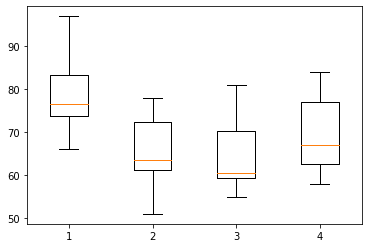

4.2210931159803815 0.013933707427484199


In [25]:
plot_data=[a,b,c,d]
ax=plt.boxplot(plot_data)
plt.show()
f,p=stats.f_oneway(a,b,c,d)
print(f,p)

In [30]:
import pandas as pd
from scipy import stats

data=pd.read_csv('d:/data/anova/fertilizers.csv')
print(data)
result=stats.f_oneway(data['fertilizer1'],data['fertilizer2'],data['fertilizer3'])
print(result)
print("통계량 :",result[0])
print("p-value :",result[1])


   fertilizer1  fertilizer2  fertilizer3
0           72           54           48
1           62           56           62
2           90           58           92
3           42           36           96
4           84           72           92
5           64           34           80
F_onewayResult(statistic=3.7551268418654105, pvalue=0.04762461989261837)
통계량 : 3.7551268418654105
p-value : 0.04762461989261837
